# Exercise 3

We generate a noisy dataset:

In [2]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [3]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


## Plotting the data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

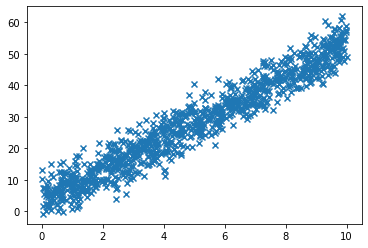

In [5]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Implementing Gradient Descent

We add an additional column for the bias to the dataset:

In [6]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [7]:
num_samples = X_.shape[0]
num_features = X_.shape[1]

initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

In [8]:
from math import ceil

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

## Tasks
Implement the following optimizers. For that, save a copy of this file for each individual optimizer. Adapt the below SGD code for the optimizer to implement. Adjust the filename of the `pickle` command, so that they do not overwrite each other.
 - SGD with a momentum of 0.3
 - SGD with Nesterov momentum of 0.3
 - Adagrad with a learning rate of 0.1 and $\epsilon=10^{-10}$
 - RMSprop with a learning rate of 0.01, $\rho=0.99$ and $\epsilon=10^{-8}$
 - Bonus: Adadelta with a learning rate of 1, $\rho=0.9$ and $\epsilon=10^{-6}$
 - Bonus: Adam with a learning rate of 0.01, $\beta_1=0.9$, $\beta_2=0.999$ and $\epsilon=10^{-8}$

## Solution

In [43]:
weights = initial_weights.copy()

losses = []
eta = 0.1
epsilon = 1e-10
sq_grad_acc = np.zeros((2, 2))
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum()/num_batch_samples
        gradient = -2.0/num_batch_samples * batch_X.T @ (batch_y - prediction)

        #compute square gradient accumulation
        sq_grad_acc += gradient @ gradient.T

        # update weights
        adaptive_lr = eta / np.sqrt(epsilon + sq_grad_acc)
        weights -= adaptive_lr @ gradient
        
        total_loss += L.item()*num_batch_samples
        
    epoch_loss = total_loss/num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses.append(epoch_loss)
    
print(weights)

epoch 1 loss: 719.4988811312902
epoch 100 loss: 26.115603557364093
epoch 200 loss: 26.186968915465396
epoch 300 loss: 26.3365229028336
[[3.87468404]
 [9.89890814]]


Interestingly, worse results are acheived compared to other optimizers: Loss of about 26 vs 14

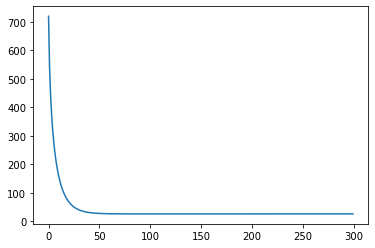

In [44]:
plt.plot(losses)
#plt.yscale('log')
plt.show()

In [45]:
import pickle
with open("_adagrad.pickle", "wb") as f:
    pickle.dump(losses, f)